In [187]:
import scipy.io as sio
import numpy as np
from os import getcwd
from os.path import join 
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
from statsmodels.multivariate.pca import PCA
from statsmodels.tsa.ar_model import AutoReg
import pandas as pd 

In [188]:
fname = join(os.getcwd(),'data','data3SS2009.mat')

mat_contents = sio.loadmat(fname)

dataset = mat_contents['dataset']

N, Chno, Nc = dataset.shape
# N: number of samples
# Chno: number of channels
# Nc: number of cases

y = mat_contents['labels'].reshape(Nc)

y


array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5

In [189]:
dataset.shape

(8192, 5, 850)

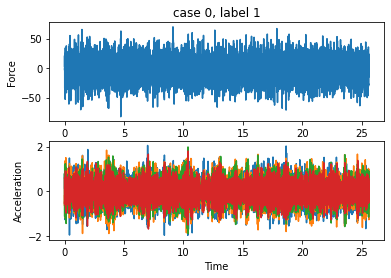

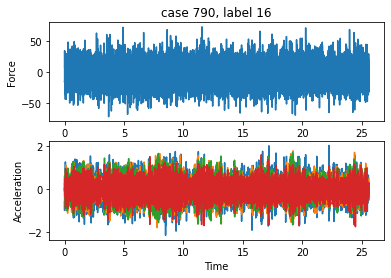

In [201]:
Ch1 = dataset[:,0,:] # célula de carga: força do shaker
Ch2 = dataset[:,1,:] # acelerômetro: base
Ch3 = dataset[:,2,:] # acelerômetro: 1o andar
Ch4 = dataset[:,3,:] # acelerômetro: 2o andar
Ch5 = dataset[:,4,:] # acelerômetro: 3o andar

Ts = 3.125 * 1e-3 # sampling time
time = (np.linspace(1,N,N) - 1) * Ts

for case in np.array([0,790]):
    plt.figure(case)
    plt.subplot(211)
    plt.title('case %d, label %d' % (case, y[case]))
    plt.plot(time,Ch1[:,case])
    plt.ylabel('Force')
    plt.subplot(212)
    plt.plot(time,Ch2[:,case],time,Ch3[:,case],time,Ch4[:,case],time,Ch5[:,case])
    plt.xlabel('Time')
    plt.ylabel('Acceleration')
    plt.show()
    


In [202]:
ARmodel_2 = AutoReg(Ch2[:,1],30,old_names=False).fit()
ARmodel_3 = AutoReg(Ch3[:,1],30,old_names=False).fit()
ARmodel_4 = AutoReg(Ch4[:,1],30,old_names=False).fit()
ARmodel_5 = AutoReg(Ch5[:,1],30,old_names=False).fit()
vec_2 = ARmodel_2.params
vec_3 = ARmodel_3.params
vec_4 = ARmodel_4.params
vec_5 = ARmodel_5.params
vec_temp = np.concatenate((vec_2,vec_3,vec_4,vec_5))

ARmodel_var = vec_temp

for i in range(2,850):
    ARmodel_2 = AutoReg(Ch2[:,i],30,old_names=False).fit()
    ARmodel_3 = AutoReg(Ch3[:,i],30,old_names=False).fit()
    ARmodel_4 = AutoReg(Ch4[:,i],30,old_names=False).fit()
    ARmodel_5 = AutoReg(Ch5[:,i],30,old_names=False).fit()
    vec_2 = ARmodel_2.params
    vec_3 = ARmodel_3.params
    vec_4 = ARmodel_4.params
    vec_5 = ARmodel_5.params
    vec_temp = np.concatenate((vec_2,vec_3,vec_4,vec_5))
    ARmodel_var = np.vstack([ARmodel_var,vec_temp])

In [203]:
ARmodel_var

array([[-4.07120501e-01, -7.17677715e-01, -1.73600239e+00, ...,
        -5.21281722e-02,  1.75589862e-02,  4.17447335e-03],
       [-4.05667198e-01, -7.16317904e-01, -1.71747048e+00, ...,
        -5.37183072e-02,  2.14079500e-02,  1.50399653e-03],
       [-4.50229834e-01, -7.20660364e-01, -1.77616072e+00, ...,
        -1.05823675e-01,  2.89871566e-02, -3.04750063e-02],
       ...,
       [-4.44177315e-01, -7.39886857e-01, -1.77207246e+00, ...,
         6.35371575e-02, -2.49773081e-02,  6.28370392e-02],
       [-4.08233478e-01, -6.96346727e-01, -1.71980664e+00, ...,
         8.49797826e-02, -1.96018664e-02,  6.87017614e-02],
       [-4.10716923e-01, -6.83191728e-01, -1.72918202e+00, ...,
         4.00375368e-02,  1.32807657e-03,  4.47932666e-02]])

In [200]:
ARmodel_pc = PCA(ARmodel_var)
ARmodel_pc

Principal Component Analysis(nobs: 849, nvar: 124, transformation: Standardize (Correlation), normalization: True, number of components: 124, SVD, id: 0x21022a02580)

In [206]:
## SCALING [-1,1]
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))

#ARmodel_var_scaled = scaler.fit_transform(ARmodel_var)
#ARmodel_var_scaled

indDam = y > 9

ARmodel_var_scaled = pd.concat([pd.DataFrame(scaler.fit_transform(ARmodel_var)),pd.DataFrame({'target' : indDam})],axis=1)
ARmodel_var_scaled.describe()


,0,1,2,3,4,5,6,7,8,9,...,114,115,116,117,118,119,120,121,122,123
count,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,...,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000
mean,0.105260,-0.466409,-0.368248,-0.319580,-0.309495,-0.340238,-0.321602,-0.352808,-0.348558,-0.378899,...,-0.170767,-0.432324,-0.162554,-0.396698,0.010840,-0.325604,-0.013929,-0.158094,0.101588,-0.103453
std,0.307910,0.310803,0.321870,0.316228,0.293515,0.283956,0.279832,0.265391,0.255925,0.244914,...,0.332965,0.339748,0.337511,0.385534,0.302361,0.414609,0.328062,0.411415,0.322674,0.382691
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.030628,-0.662321,-0.585625,-0.542011,-0.510952,-0.526931,-0.504207,-0.534822,-0.520603,-0.545202,...,-0.402395,-0.659288,-0.393381,-0.664294,-0.191766,-0.625910,-0.231038,-0.486845,-0.110750,-0.427008
50%,0.158662,-0.541240,-0.437479,-0.364958,-0.346414,-0.378212,-0.358116,-0.383815,-0.375817,-0.403139,...,-0.160585,-0.533073,-0.150439,-0.515898,0.038365,-0.447234,-0.025536,-0.216079,0.129354,-0.165191
75%,0.288573,-0.346946,-0.206806,-0.137290,-0.161319,-0.213175,-0.190400,-0.214155,-0.197237,-0.242481,...,0.029131,-0.327170,0.043591,-0.238556,0.189860,-0.091909,0.201592,0.138093,0.338261,0.206637
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


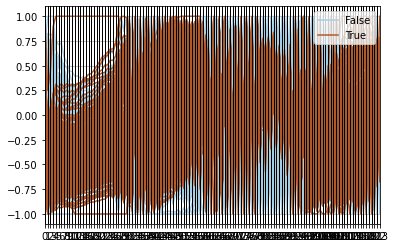

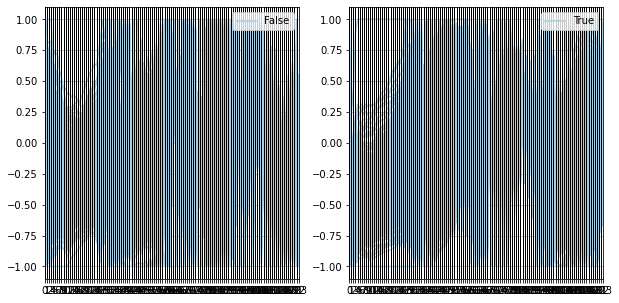

In [210]:
plt.figure()
pd.plotting.parallel_coordinates(ARmodel_var_scaled, 'target', colormap=plt.get_cmap('Paired'))
plt.show()

plt.figure(figsize=[10,5])
plt.subplot(121)
pd.plotting.parallel_coordinates(ARmodel_var_scaled[ARmodel_var_scaled['target']==0], 'target',colormap=plt.get_cmap('Paired'))
plt.subplot(122)
pd.plotting.parallel_coordinates(ARmodel_var_scaled[ARmodel_var_scaled['target']==1], 'target',colormap=plt.get_cmap('Paired'))
plt.show()